In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import Ofpp

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Add font path explicitly and set it in rcParams
font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf'
prop = fm.FontProperties(fname=font_path)

# Set default font family to Times New Roman
plt.rcParams['font.family'] = prop.get_name()  # This uses the font's name

# Set general rcParams
mpl.rcParams['lines.linewidth'] = 1.0
mpl.rcParams['axes.linewidth'] = 0.5 
mpl.rcParams['xtick.major.size'] = 3.5 
mpl.rcParams['ytick.major.size'] = 3.5 
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["k"]) 
mpl.rcParams['xtick.major.width'] = 0.5 
mpl.rcParams['ytick.major.width'] = 0.5 
mpl.rcParams['lines.markersize'] = 5

# Set font properties and math settings
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix",
      'font.size'   : 8}
plt.rcParams.update(rc)

# If you don't need LaTeX rendering, ensure this is False
mpl.rcParams['text.usetex'] = False

# More settings
plt.rcParams["lines.solid_joinstyle"]='miter'
params = {'legend.fontsize': 6,
          'legend.frameon': True,
          'legend.borderpad': 0.3,
          'legend.handlelength': 1.0,
          'legend.handletextpad': 0.4,
          'legend.labelspacing':0.25,
          'legend.fancybox': False,
          'legend.edgecolor': 'k',
          'patch.linewidth':0.5,
          'savefig.format': 'pdf',
          'savefig.bbox': 'tight'}
plt.rcParams.update(params)

# You can now use Times New Roman for any plots


FileNotFoundError: [Errno 2] No such file or directory: 'figs/bii_R_loss.pdf'

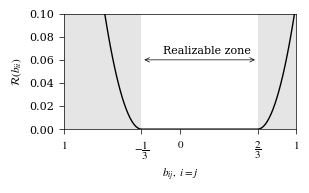

In [3]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(3,1.5))

bii = np.linspace(-2/3,1,100)
bij = np.linspace(-1/2-1/3,1/2+1/3,100)

pii = (np.maximum(np.maximum(bii-2/3, - (bii+1/3)), 0))**2
pij = (np.maximum(np.maximum(bij-1/2, - (bij+1/2)), 0))**2

ax.plot(bii,pii)
ax.fill_betweenx([0,1],2/3,10,alpha=0.1)
ax.fill_betweenx([0,1],-10,-1/3,alpha=0.1)
ax.set_xlim([-1,1])
ax.set_ylim([0,0.1])
ax.set_xticks([-1, -1/3, 0, 2/3, 1.0], [r'$1$',r'$-\dfrac{1}{3}$', r'$0$', r'$\dfrac{2}{3}$',r'$1$'])
ax.annotate(text='', xy=(2/3,0.06), xytext=(-1/3,0.06), arrowprops=dict(arrowstyle='<->'),color='k')
ax.annotate(text='Realizable zone', xy=(-0.15,0.065),color='k')

#ax.set_yticks([0,10,20,30,40,50])

ax.set_xlabel(r'$b_{ij}, \ i=j$')
ax.set_ylabel(r'$\mathcal{R}(b_{ii})$')
fig.savefig('figs/bii_R_loss.pdf')

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(3,1.5))

bij = np.linspace(-1/2-1/3,1/2+1/3,100)

pij = (np.maximum(np.maximum(bij-1/2, - (bij+1/2)), 0))**2

ax.plot(bij,pij)
ax.fill_betweenx([0,1],1/2,10,alpha=0.1)
ax.fill_betweenx([0,1],-10,-1/2,alpha=0.1)
ax.set_xlim([-1,1])
ax.set_ylim([0,0.1])
ax.set_xticks([-1, -1/2, 0, 1/2, 1.0], [r'$1$',r'$-\dfrac{1}{2}$', r'$0$', r'$\dfrac{1}{2}$',r'$1$'])
ax.annotate(text='', xy=(1/2,0.06), xytext=(-1/2,0.06), arrowprops=dict(arrowstyle='<->'),color='k')
ax.annotate(text='Realizable zone', xy=(-0.32,0.065),color='k')

#ax.set_yticks([0,10,20,30,40,50])

ax.set_xlabel(r'$b_{ij}, \ i\neq j $')
ax.set_ylabel(r'$\mathcal{R}(b_{ij})$')
fig.savefig('figs/bij_R_loss.pdf')

In [ ]:
import matplotlib.ticker as mtick
from matplotlib.patches import Patch
from matplotlib.text import Text
import matplotlib as mpl
from matplotlib.lines import Line2D
import os
import Ofpp

line_width_plots = 1
line_width_contours = 0.5
levels=100

geom = np.loadtxt('data/pehill1p2_geometry.csv', 
                         delimiter=",",
                         skiprows=1)

C = Ofpp.parse_internal_field('data/case_1p2_C')
x, y = C[:,0], C[:,1]
U_DNS = Ofpp.parse_internal_field('data/case_1p2_U_DNS')
U_exact = Ofpp.parse_internal_field('data/conditioning_test_case_1p2_U_exact_nnls')
U_exp = Ofpp.parse_internal_field('data/conditioning_test_case_1p2_U_fully_explicit')
U_prop = Ofpp.parse_internal_field('data/conditioning_test_case_1p2_U_proposed')
U_RANSlinear = Ofpp.parse_internal_field('data/conditioning_test_case_1p2_U_RANS_linear')

E_U_exact = U_exact[:,0] - U_DNS[:,0]
E_V_exact = U_exact[:,1] - U_DNS[:,1]
E_U_exp = U_exp[:,0] - U_DNS[:,0]
E_V_exp = U_exp[:,1] - U_DNS[:,1]
E_U_prop = U_prop[:,0] - U_DNS[:,0]
E_V_prop = U_prop[:,1] - U_DNS[:,1]
E_U_RANSlinear = U_RANSlinear[:,0] - U_DNS[:,0]
E_V_RANSlinear = U_RANSlinear[:,1] - U_DNS[:,1]

def rmse(error):
    return np.sqrt(np.mean(np.square(error)))

fig = plt.figure(figsize=(6.,6),layout='compressed')

gs = fig.add_gridspec(4,2,width_ratios = [1,0.05],height_ratios = [1,1,1,1],hspace=0.,wspace=0.1)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[2, 0])
ax4 = fig.add_subplot(gs[3, 0])

cax = fig.add_subplot(gs[:, 1])

#%% Contour plots

"""ax1.tricontour(x,y,E_V_exp,
               levels=levels_contour,
               linewidths=line_width_contours,
               colors='0.3',
               linestyles='solid'
               )"""
levels = 200
range_min = -0.002
range_max = 0.002

colormap = 'PiYG'
scale = .66666/0.020188
contour=ax1.tricontourf(x,y,E_U_exp,
               levels=levels,
               cmap=colormap,
               vmin=range_min,
               vmax=range_max,
               extend='both',
               zorder=-10)
#ax1.set_title(r"$a=a_\theta, \ \nu_t = 0$" "\n"r" $RMSE_{V_\theta}$ = "+"{:.3E}".format(mse(E_U_exp)) +" m/s" "\n(a)",
#              y=-0.55)
ax1.text(.2,1.8,"(a)\n"+ r"$a_{ij}=a^\theta_{ij}, \ \nu_t = 0, \ a^\perp = a^\theta_{ij}$" "\n"r"${\rm RMSE}(U_1)$ = "+"{:.1E}".format(rmse(E_U_exp)) +" m/s")
ax2.tricontourf(x,y,E_U_exact,
               levels=levels,
               cmap=colormap,
               vmin=range_min,
               vmax=range_max,
               zorder=-10
               )
ax2.text(.2,1.8,"(b)\n"+ r"$a_{ij}=a^\theta_{ij}, \ \nu_t = \nu^{\theta\dagger}_t, \ a^\perp_{ij} = a^\theta_{ij} + 2\nu^{\theta \dagger}_t S^\theta_{ij} $" "\n"r"${\rm RMSE}(U_1)$ = "+"{:.1E}".format(rmse(E_U_exact)) +" m/s")

#ax2.set_title(r"$a=a_\theta, \ \nu_t = \nu_t^\dagger$" "\n"r" $RMSE_{V_\theta}$ = "+"{:.3E}".format(mse(E_U_exact)) +" m/s" "\n(b)" ,
#              y=-0.7)

ax3.tricontourf(x,y,E_U_prop,
               levels=levels,
               cmap=colormap,
               vmin=range_min,
               vmax=range_max,
               zorder=-10
               )
ax3.text(.2,1.8,"(c)\n"+ r"$a_{ij}=a^\theta_{ij}, \ \nu_t = \nu^{\rm R}_t,  \ a^\perp_{ij} = a^\theta_{ij} + 2\nu^{\rm R}_t S^\theta_{ij} $  " "\n"r"${\rm RMSE}(U_1)$ = "+"{:.1E}".format(rmse(E_U_prop)) +" m/s")

#ax3.set_title(r"$a=a_\theta, \ \nu_t = \nu_t^\dagger$" "\n"r" $RMSE_{V_\theta}$ = "+"{:.3E}".format(mse(E_U_prop)) +" m/s" "\n(b)" ,
#              y=-0.7)

ax4.tricontourf(x,y,E_U_RANSlinear,
               levels=levels,
               cmap=colormap,
               vmin=range_min,
               vmax=range_max,
               zorder=-10
               )
ax4.text(.2,1.8,"(d)\n"+ r"$a_{ij}=a^\theta_{ij}, \ \nu_t = \nu^{\rm R}_t,  \ a^\perp_{ij} = a^\theta_{ij} + 2\nu^{\rm R}_t S^{\rm R}_{ij} $ " "\n"r"${\rm RMSE}(U_1)$ = "+"{:.1E}".format(rmse(E_U_RANSlinear)) +" m/s")

#ax4.set_title(r"$a=a_\theta, \ \nu_t = \nu_t^\dagger$" "\n"r" $RMSE_{V_\theta}$ = "+"{:.3E}".format(mse(E_U_RANSlinear)) +" m/s" "\n(b)" ,
#              y=-0.7)


#from mpl_toolkits.axes_grid1 import make_axes_locatable
#divider = make_axes_locatable(ax2)

cbar=fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=range_min, vmax=range_max), cmap=colormap), cax=cax,orientation = 'vertical',
             ticks=[range_min, 0, range_max])
#cbar.ax.set_yticklabels([f'{range_min}', '0', f'{range_max}'])
cbar.set_label(r'$U_1-U_{1\theta}$ (m/s)')

#ax1.set_xlabel(r"$\dfrac{x}{H}+\dfrac{2}{3}\dfrac{U}{\overline{U}}$")
#ax1.set_ylabel(r"$\dfrac{y}{H}$")


geom = np.vstack([geom,np.array([0,1])])
for ax in [ax1,ax2,ax3,ax4]:
    ax.set_rasterization_zorder(-1)
    ax.set_xlim([0.05,9.72])
    ax.set_ylim([-0.1,3.1])
    ax.set_aspect(1)
    ax.set_axis_off()
    ax.fill_between(geom[:,0],geom[:,1],y2=-0.1,
                     color='lightgrey',
                     linestyle='-',linewidth=1,label=None,zorder=100,
                     )
    y_top = 3.036
    ax.plot(geom[:,0],geom[:,1],'k-',linewidth=.5,zorder=101)

    ax.fill_between(geom[:,0],y_top*np.ones(geom[:,0].shape),y2=3.1036,
                     color='lightgrey',
                     linestyle='-',linewidth=1,label=None,zorder=100
                     )

    #ax.plot(geom[:,0],geom[:,1],'k-',linewidth=1,zorder=-99)
    ax.plot(geom[:,0],y_top*np.ones(geom[:,0].shape),'k-',linewidth=.5,zorder=101)
    
#fig.subplots_adjust(right=0.7)
#fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)
#fig.tight_layout()
#fig.tight_layout(rect=[0, 0.03, 1, .8])

#%% Saving
#fig.tight_layout()
fig.savefig('figs/conditioning_U.pdf',dpi=200)



In [ ]:
import matplotlib.ticker as mtick
from matplotlib.patches import Patch
from matplotlib.text import Text
import matplotlib as mpl
from matplotlib.lines import Line2D
import os
import Ofpp

line_width_plots = 1
line_width_contours = 0.5
levels=100

geom = np.loadtxt('data/pehill1p2_geometry.csv', 
                         delimiter=",",
                         skiprows=1)

C = Ofpp.parse_internal_field('data/case_1p2_C')
x, y = C[:,0], C[:,1]
U_DNS = Ofpp.parse_internal_field('data/case_1p2_U_DNS')
U_exact = Ofpp.parse_internal_field('data/conditioning_test_case_1p2_U_exact_nnls')
U_exp = Ofpp.parse_internal_field('data/conditioning_test_case_1p2_U_fully_explicit')
U_prop = Ofpp.parse_internal_field('data/conditioning_test_case_1p2_U_proposed')
U_RANSlinear = Ofpp.parse_internal_field('data/conditioning_test_case_1p2_U_RANS_linear')

E_U_exact = U_exact[:,0] - U_DNS[:,0]
E_V_exact = U_exact[:,1] - U_DNS[:,1]
E_U_exp = U_exp[:,0] - U_DNS[:,0]
E_V_exp = U_exp[:,1] - U_DNS[:,1]
E_U_prop = U_prop[:,0] - U_DNS[:,0]
E_V_prop = U_prop[:,1] - U_DNS[:,1]
E_U_RANSlinear = U_RANSlinear[:,0] - U_DNS[:,0]
E_V_RANSlinear = U_RANSlinear[:,1] - U_DNS[:,1]

def rmse(error):
    return np.sqrt(np.mean(np.square(error)))

fig = plt.figure(figsize=(6.,6),layout='compressed')

gs = fig.add_gridspec(4,2,width_ratios = [1,0.05],height_ratios = [1,1,1,1],hspace=0.,wspace=0.1)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[2, 0])
ax4 = fig.add_subplot(gs[3, 0])

cax = fig.add_subplot(gs[:, 1])

#%% Contour plots

"""ax1.tricontour(x,y,E_V_exp,
               levels=levels_contour,
               linewidths=line_width_contours,
               colors='0.3',
               linestyles='solid'
               )"""
levels = 200
range_min = -0.0005
range_max = 0.0005

colormap = 'PiYG'
scale = .66666/0.020188
contour=ax1.tricontourf(x,y,E_V_exp,
               levels=levels,
               cmap=colormap,
               vmin=range_min,
               vmax=range_max,
               extend='both',
               zorder=-10)
#ax1.set_title(r"$a=a_\theta, \ \nu_t = 0$" "\n"r" $RMSE_{V_\theta}$ = "+"{:.3E}".format(mse(E_U_exp)) +" m/s" "\n(a)",
#              y=-0.55)
ax1.text(.2,1.8,"(a)\n"+ r"$a_{ij}=a^\theta_{ij}, \ \nu_t = 0, \ a^\perp = a^\theta_{ij}$" "\n"r"${\rm RMSE}(U_2)$ = "+"{:.1E}".format(rmse(E_V_exp)) +" m/s")
ax2.tricontourf(x,y,E_V_exact,
               levels=levels,
               cmap=colormap,
               vmin=range_min,
               vmax=range_max,
               zorder=-10
               )
ax2.text(.2,1.8,"(b)\n"+ r"$a_{ij}=a^\theta_{ij}, \ \nu_t = \nu^{\theta\dagger}_t, \ a^\perp_{ij} = a^\theta_{ij} + 2\nu^{\theta \dagger}_t S^\theta_{ij} $" "\n"r"${\rm RMSE}(U_2)$ = "+"{:.1E}".format(rmse(E_V_exact)) +" m/s")

#ax2.set_title(r"$a=a_\theta, \ \nu_t = \nu_t^\dagger$" "\n"r" $RMSE_{V_\theta}$ = "+"{:.3E}".format(mse(E_U_exact)) +" m/s" "\n(b)" ,
#              y=-0.7)

ax3.tricontourf(x,y,E_V_prop,
               levels=levels,
               cmap=colormap,
               vmin=range_min,
               vmax=range_max,
               zorder=-10
               )
ax3.text(.2,1.8,"(c)\n"+ r"$a_{ij}=a^\theta_{ij}, \ \nu_t = \nu^{\rm R}_t,  \ a^\perp_{ij} = a^\theta_{ij} + 2\nu^{\rm R}_t S^\theta_{ij} $  " "\n"r"${\rm RMSE}(U_2)$ = "+"{:.1E}".format(rmse(E_V_prop)) +" m/s")

#ax3.set_title(r"$a=a_\theta, \ \nu_t = \nu_t^\dagger$" "\n"r" $RMSE_{V_\theta}$ = "+"{:.3E}".format(mse(E_U_prop)) +" m/s" "\n(b)" ,
#              y=-0.7)

ax4.tricontourf(x,y,E_V_RANSlinear,
               levels=levels,
               cmap=colormap,
               vmin=range_min,
               vmax=range_max,
               zorder=-10
               )
ax4.text(.2,1.8,"(d)\n"+ r"$a_{ij}=a^\theta_{ij}, \ \nu_t = \nu^{\rm R}_t,  \ a^\perp_{ij} = a^\theta_{ij} + 2\nu^{\rm R}_t S^{\rm R}_{ij} $ " "\n"r"${\rm RMSE}(U_2)$ = "+"{:.1E}".format(rmse(E_V_RANSlinear)) +" m/s")

#ax4.set_title(r"$a=a_\theta, \ \nu_t = \nu_t^\dagger$" "\n"r" $RMSE_{V_\theta}$ = "+"{:.3E}".format(mse(E_U_RANSlinear)) +" m/s" "\n(b)" ,
#              y=-0.7)


#from mpl_toolkits.axes_grid1 import make_axes_locatable
#divider = make_axes_locatable(ax2)

cbar=fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=range_min, vmax=range_max), cmap=colormap), cax=cax,orientation = 'vertical',
             ticks=[range_min, 0, range_max])

#cbar.ax.set_yticklabels([f'{range_min}', '0', f'{range_max}'])
cbar.set_label(r'$U_2-U_{2\theta}$ (m/s)')

#ax1.set_xlabel(r"$\dfrac{x}{H}+\dfrac{2}{3}\dfrac{U}{\overline{U}}$")
#ax1.set_ylabel(r"$\dfrac{y}{H}$")


geom = np.vstack([geom,np.array([0,1])])
for ax in [ax1,ax2,ax3,ax4]:
    ax.set_xlim([0.05,9.72])
    ax.set_ylim([-0.1,3.1])
    ax.set_aspect(1)
    ax.set_axis_off()
    ax.set_rasterization_zorder(-1)
    ax.fill_between(geom[:,0],geom[:,1],y2=-0.1,
                     color='lightgrey',
                     linestyle='-',linewidth=1,label=None,zorder=100,
                     )
    y_top = 3.036
    ax.plot(geom[:,0],geom[:,1],'k-',linewidth=.5,zorder=101)

    ax.fill_between(geom[:,0],y_top*np.ones(geom[:,0].shape),y2=3.1036,
                     color='lightgrey',
                     linestyle='-',linewidth=1,label=None,zorder=100
                     )

    #ax.plot(geom[:,0],geom[:,1],'k-',linewidth=1,zorder=-99)
    ax.plot(geom[:,0],y_top*np.ones(geom[:,0].shape),'k-',linewidth=.5,zorder=101)
    
#fig.subplots_adjust(right=0.7)
#fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)
#fig.tight_layout()
#fig.tight_layout(rect=[0, 0.03, 1, .8])

#%% Saving
#fig.tight_layout()
fig.savefig('figs/conditioning_V.pdf',dpi=200)



In [3]:
def get_epoch_of_minimum_val_loss(val_loss):
    print(f'Epoch: {np.argmin(val_loss)+1}')


In [4]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Add Times New Roman explicitly if needed
font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf'
prop = fm.FontProperties(fname=font_path)

# Set 'Times New Roman' as the primary serif font
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']

# Check the updated font settings
print(plt.rcParams['font.family'])
print(plt.rcParams['font.serif'])


['serif']
['Times New Roman']


Epoch: 2957


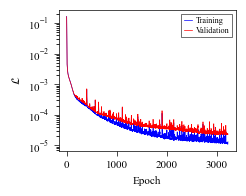

In [6]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(2.5,2))
losses = np.loadtxt('/home/nikki/kan/kanTBNN/models/multi_run/kan_experiment_148_opt/kanTBNN-24Nov08_07:54:27_losses.pnglosses.csv',delimiter=',')
train_loss = losses[0,:]
val_loss = losses[1,:]
get_epoch_of_minimum_val_loss(val_loss)

ax.plot(train_loss,'b',label='Training',linewidth=.5)
ax.plot(val_loss,'r',label='Validation',linewidth=.5)


#ax.set_xlim([-1,1])
#ax.set_ylim([0,0.1])
ax.set_yscale('log')
ax.legend()

#ax.set_yticks([0,10,20,30,40,50])
ax.legend
ax.set_xlabel(r'Epoch')
ax.set_ylabel(r'$\mathcal{L}$')
fig.tight_layout()
fig.savefig('/home/nikki/kan/Figures/Flat_plate/fp_kan_tv_loss.pdf')

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(2.5,2))
losses = np.loadtxt('data/fp_KCNN-24May23_10:19:17_losses.pnglosses.csv',delimiter=',')
train_loss = losses[0,:]
val_loss = losses[1,:]
get_epoch_of_minimum_val_loss(val_loss)


ax.plot(train_loss,'b',label='Training',linewidth=.5)
ax.plot(val_loss,'r',label='Validation',linewidth=.5)


#ax.set_xlim([-1,1])
#ax.set_ylim([0,0.1])
ax.set_yscale('log')
ax.legend()

#ax.set_yticks([0,10,20,30,40,50])
ax.legend
ax.set_xlabel(r'Epoch')
ax.set_ylabel(r'$\mathcal{L}$')
fig.tight_layout()
fig.savefig('figs/fp_kcnn_tv_loss.pdf')

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(2.5,2))
losses = np.loadtxt('data/duct_TBNNiii-24May29_15:23:28_losses.pnglosses.csv',delimiter=',')
train_loss = losses[0,:]
val_loss = losses[1,:]
get_epoch_of_minimum_val_loss(val_loss)


ax.plot(train_loss,'b',label='Training',linewidth=.5)
ax.plot(val_loss,'r',label='Validation',linewidth=.5)


#ax.set_xlim([-1,1])
#ax.set_ylim([0,0.1])
ax.set_yscale('log')
ax.legend()

#ax.set_yticks([0,10,20,30,40,50])
ax.legend
ax.set_xlabel(r'Epoch')
ax.set_ylabel(r'$\mathcal{L}$')
fig.tight_layout()
fig.savefig('figs/duct_tbnn_tv_loss.pdf')

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(2.5,2))
losses = np.loadtxt('data/duct_KCNN-24May27_08:59:17_losses.pnglosses.csv',delimiter=',')
train_loss = losses[0,:]
val_loss = losses[1,:]
get_epoch_of_minimum_val_loss(val_loss)


ax.plot(train_loss,'b',label='Training',linewidth=.5)
ax.plot(val_loss,'r',label='Validation',linewidth=.5)


#ax.set_xlim([-1,1])
ax.set_ylim([1E-2,2E-1])
ax.set_yscale('log')
ax.legend()

#ax.set_yticks([0,10,20,30,40,50])
ax.legend
ax.set_xlabel(r'Epoch')
ax.set_ylabel(r'$\mathcal{L}$')
fig.tight_layout()
fig.savefig('figs/duct_kcnn_tv_loss.pdf')

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(2.5,2))
losses = np.loadtxt('data/phll_TBNNiii-24May30_22:10:42_losses.pnglosses.csv',delimiter=',')
train_loss = losses[0,:]
val_loss = losses[1,:]
get_epoch_of_minimum_val_loss(val_loss)


ax.plot(train_loss,'b',label='Training',linewidth=.5)
ax.plot(val_loss,'r',label='Validation',linewidth=.5)


#ax.set_xlim([-1,1])
#ax.set_ylim([0,0.1])
ax.set_yscale('log')
ax.legend()

#ax.set_yticks([0,10,20,30,40,50])
ax.legend
ax.set_xlabel(r'Epoch')
ax.set_ylabel(r'$\mathcal{L}$')
fig.tight_layout()
fig.savefig('figs/phll_tbnn_tv_loss.pdf')

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(2.5,2))
losses = np.loadtxt('data/phll_KCNN-24May28_16:28:33_losses.pnglosses.csv',delimiter=',')
train_loss = losses[0,:]
val_loss = losses[1,:]
get_epoch_of_minimum_val_loss(val_loss)


ax.plot(train_loss,'b',label='Training',linewidth=.5)
ax.plot(val_loss,'r',label='Validation',linewidth=.5)


#ax.set_xlim([-1,1])
#ax.set_ylim([0,0.1])
ax.set_yscale('log')
ax.legend()

#ax.set_yticks([0,10,20,30,40,50])
ax.legend
ax.set_xlabel(r'Epoch')
ax.set_ylabel(r'$\mathcal{L}$')
fig.tight_layout()
fig.savefig('figs/phll_kcnn_tv_loss.pdf')

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(2,2))


DNS_Uplus = np.load('data/DNS_fp_3630_Uplus.npy')
DNS_yplus = np.load('data/DNS_fp_3630_yplus.npy')

ko_Uplus = np.load('data/komegasst_fp_3630_Uplus.npy')
ko_yplus = np.load('data/komegasst_fp_3630_yplus.npy')


ko_yplus = np.load('/home/ryley/WDK/ML/dataset/numpy/komegasst/komegasst_fp_3630_yplus.npy')
ax.plot(DNS_yplus, DNS_Uplus[:,0],'k',label='DNS (Schlatter and Örlü, 2010)',lw=2)

ax.plot(ko_yplus, ko_Uplus[:,0],'r',label=r'$k$-$\omega$ SST')
#ax.plot(yplus,df_tbnn['pred_a_12'],'b',label='Predicted')

#ax.set_xlim([-1,1])
#ax.set_xlim([0,0.1])
#ax.set_yscale('log')
ax.legend()
ax.set_xscale('log')
ax.set_xlim([1E-1,450])

#ax.set_yscale('log')

#ax.set_yticks([0,10,20,30,40,50])
ax.legend
ax.set_xlabel(r'${\rm log}(y^+)$')
ax.set_ylabel(r'$U^+_1$')
fig.savefig('figs/fp_Uplus_yPlus.pdf')

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(3,2))


DNS_Retheta = np.load('data/komegasst_x_Retheta_flatplate_ref.npy')
ko_Retheta = np.load('data/komegasst_x_Retheta_flatplate_RANS.npy')


ax.plot(DNS_Retheta[:,0], DNS_Retheta[:,1],'k',label='DNS (Schlatter and Örlü, 2010)',lw=2)

ax.plot(ko_Retheta[:,0], ko_Retheta[:,1],'r',label=r'$k$-$\omega$ SST')
#ax.plot(yplus,df_tbnn['pred_a_12'],'b',label='Predicted')

ax.set_xlim([0,2])
ax.set_ylim([0,15000])
#ax.set_yscale('log')
ax.legend()
#ax.set_xscale('log')
#ax.set_xlim([1E-1,450])

#ax.set_yscale('log')

#ax.set_yticks([0,10,20,30,40,50])
ax.legend
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$Re_\theta$')
fig.savefig('figs/fp_Retheta.pdf')

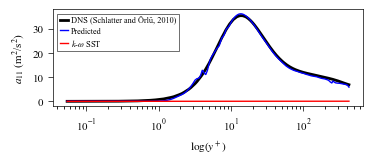

In [5]:
####START OF THE DATA PLOTS####

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(4,1.25))
df_tbnn = pd.read_csv('/home/nikki/kan/kanTBNN/models/multi_run/kan_experiment_148_opt/kanTBNN-24Nov08_07:54:27_df_test_tbnn_fp.csv')
df_kcnn = pd.read_csv('/home/nikki/kan/kanTBNN/models/obsolete/fp_only/KCNN-24May23_10:19:17_df_test_kcnn_fp.csv')

#train_loss = losses[0,:]
#val_loss = losses[1,:]
yplus = np.load('/home/nikki/kan/data/komegasst_fp_3630_yplus.npy')
ax.plot(yplus,df_tbnn['DNS_a_11'],'k',label='DNS (Schlatter and Örlü, 2010)',lw=2)

ax.plot(yplus,2*df_kcnn['pred_k']*df_tbnn['pred_b_11'],'b',label='Predicted')
#ax.plot(yplus,df_tbnn['pred_a_12'],'b',label='Predicted')

ax.plot(yplus,-2*df_tbnn['komegasst_nut']*df_tbnn['komegasst_S_11'],'r',label='$k$-$\omega$ SST')

#ax.set_xlim([-1,1])
#ax.set_ylim([0,0.1])
#ax.set_yscale('log')
ax.legend()
ax.set_xscale('log')

#ax.set_yticks([0,10,20,30,40,50])
ax.legend
ax.set_xlabel(r'${\rm log}(y^+)$')
ax.set_ylabel(r'$a_{11}$ (m$^2$/s$^2$)')
fig.savefig('/home/nikki/kan/Figures/Flat_plate/fp_a11_pred-final.pdf')

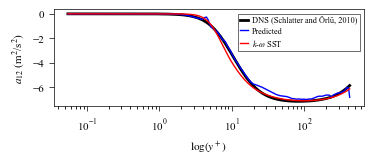

In [6]:
######CELL NEEDED TO BE EDITED#######

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(4,1.25))
df_tbnn = pd.read_csv('/home/nikki/kan/kanTBNN/models/multi_run/kan_experiment_148_opt/kanTBNN-24Nov08_07:54:27_df_test_tbnn_fp.csv')
df_kcnn = pd.read_csv('/home/nikki/kan/kanTBNN/models/obsolete/fp_only/KCNN-24May23_10:19:17_df_test_kcnn_fp.csv')

#train_loss = losses[0,:]
#val_loss = losses[1,:]
yplus = np.load('/home/nikki/kan/data/komegasst_fp_3630_yplus.npy')
ax.plot(yplus,df_tbnn['DNS_a_12'],'k',label='DNS (Schlatter and Örlü, 2010)',lw=2)

ax.plot(yplus,2*df_kcnn['pred_k']*df_tbnn['pred_b_12'],'b',label='Predicted')
#ax.plot(yplus,df_tbnn['pred_a_12'],'b',label='Predicted')

ax.plot(yplus,-2*df_tbnn['komegasst_nut']*df_tbnn['komegasst_S_12'],'r',label='$k$-$\omega$ SST')

#ax.set_xlim([-1,1])
#ax.set_ylim([0,0.1])
#ax.set_yscale('log')
ax.legend()
ax.set_xscale('log')

#ax.set_yticks([0,10,20,30,40,50])
ax.legend
ax.set_xlabel(r'${\rm log}(y^+)$')
ax.set_ylabel(r'$a_{12}$ (m$^2$/s$^2$)')
fig.savefig('/home/nikki/kan/Figures/Flat_plate/fp_a12_pred-final.pdf')

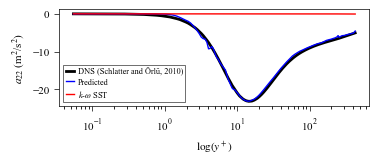

In [7]:
#plotting more data for KAN?
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(4,1.25))
df_tbnn = pd.read_csv('/home/nikki/kan/kanTBNN/models/multi_run/kan_experiment_148_opt/kanTBNN-24Nov08_07:54:27_df_test_tbnn_fp.csv')
df_kcnn = pd.read_csv('/home/nikki/kan/kanTBNN/models/obsolete/fp_only/KCNN-24May23_10:19:17_df_test_kcnn_fp.csv')

#train_loss = losses[0,:]
#val_loss = losses[1,:]
yplus = np.load('/home/nikki/kan/data/komegasst_fp_3630_yplus.npy')
ax.plot(yplus,df_tbnn['DNS_a_22'],'k',label='DNS (Schlatter and Örlü, 2010)',lw=2)

ax.plot(yplus,2*df_kcnn['pred_k']*df_tbnn['pred_b_22'],'b',label='Predicted')
#ax.plot(yplus,df_tbnn['pred_a_12'],'b',label='Predicted')

ax.plot(yplus,-2*df_tbnn['komegasst_nut']*df_tbnn['komegasst_S_22'],'r',label='$k$-$\omega$ SST')

#ax.set_xlim([-1,1])
#ax.set_ylim([0,0.1])
#ax.set_yscale('log')
ax.legend()
ax.set_xscale('log')

#ax.set_yticks([0,10,20,30,40,50])
ax.legend
ax.set_xlabel(r'${\rm log}(y^+)$')
ax.set_ylabel(r'$a_{22}$ (m$^2$/s$^2$)')
fig.savefig('/home/nikki/kan/Figures/Flat_plate/fp_a22_pred-final.pdf')

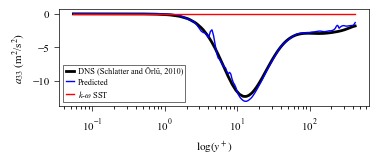

In [8]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(4,1.25))
df_tbnn = pd.read_csv('/home/nikki/kan/kanTBNN/models/multi_run/kan_experiment_148_opt/kanTBNN-24Nov08_07:54:27_df_test_tbnn_fp.csv')
df_kcnn = pd.read_csv('/home/nikki/kan/kanTBNN/models/obsolete/fp_only/KCNN-24May23_10:19:17_df_test_kcnn_fp.csv')

#train_loss = losses[0,:]
#val_loss = losses[1,:]
yplus = np.load('/home/nikki/kan/data/komegasst_fp_3630_yplus.npy')
ax.plot(yplus,df_tbnn['DNS_a_33'],'k',label='DNS (Schlatter and Örlü, 2010)',lw=2)

ax.plot(yplus,2*df_kcnn['pred_k']*df_tbnn['pred_b_33'],'b',label='Predicted')
#ax.plot(yplus,df_tbnn['pred_a_12'],'b',label='Predicted')

ax.plot(yplus,-2*df_tbnn['komegasst_nut']*df_tbnn['komegasst_S_33'],'r',label='$k$-$\omega$ SST')

#ax.set_xlim([-1,1])
#ax.set_ylim([0,0.1])
#ax.set_yscale('log')
ax.legend()
ax.set_xscale('log')

#ax.set_yticks([0,10,20,30,40,50])
ax.legend
ax.set_xlabel(r'${\rm log}(y^+)$')
ax.set_ylabel(r'$a_{33}$ (m$^2$/s$^2$)')
fig.savefig('/home/nikki/kan/Figures/Flat_plate/fp_a33_pred-final.pdf')

HERE THE MULTIGRAPH IS  TRIED OUT

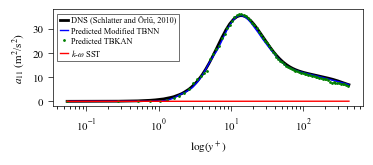

In [19]:
####START OF THE DATA PLOTS####

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(4,1.25))
df_kan = pd.read_csv('/home/nikki/kan/kanTBNN/models/multi_run/kan_experiment_148_opt/kanTBNN-24Nov08_07:54:27_df_test_tbnn_fp.csv')
df_kcnn = pd.read_csv('/home/nikki/kan/kanTBNN/models/obsolete/fp_only/KCNN-24May23_10:19:17_df_test_kcnn_fp.csv')
df_tbnn = pd.read_csv('/home/nikki/kan/kanTBNN/models/obsolete/fp_only/TBNNiii-24May22_10:36:08_df_test_tbnn_fp.csv')

#train_loss = losses[0,:]
#val_loss = losses[1,:]
yplus = np.load('/home/nikki/kan/data/komegasst_fp_3630_yplus.npy')
ax.plot(yplus,df_tbnn['DNS_a_11'],'k',label='DNS (Schlatter and Örlü, 2010)',lw=2)

ax.plot(yplus,2*df_kcnn['pred_k']*df_tbnn['pred_b_11'],'b',label='Predicted Modified TBNN')
#ax.plot(yplus, 2 * df_kcnn['pred_k'] * df_kan['pred_b_11'], 'g', marker='o', linestyle='', markersize=4, label='Predicted TBKAN')
ax.plot(yplus[::2], 2 * df_kcnn['pred_k'][::2] * df_kan['pred_b_11'][::2], 'g', marker='o', linestyle='', markersize=1, label='Predicted TBKAN')

#ax.plot(yplus,df_tbnn['pred_a_12'],'b',label='Predicted')

ax.plot(yplus,-2*df_tbnn['komegasst_nut']*df_tbnn['komegasst_S_11'],'r',label='$k$-$\omega$ SST')

#ax.set_xlim([-1,1])
#ax.set_ylim([0,0.1])
#ax.set_yscale('log')
ax.legend()
ax.set_xscale('log')

#ax.set_yticks([0,10,20,30,40,50])
ax.legend
ax.set_xlabel(r'${\rm log}(y^+)$')
ax.set_ylabel(r'$a_{11}$ (m$^2$/s$^2$)')
fig.savefig('/home/nikki/kan/Figures/Flat_plate/fp_a11_pred-together.pdf')

In [73]:
import numpy.linalg as linalg
def xB_yB(df,name):
    b = np.empty((len(df),3,3))
    if name == 'rans':
        b[:,0,0] = -2*df[f'komegasst_nut']*df[f'komegasst_S_11']/(2*df['komegasst_k'])
        b[:,0,1] = -2*df[f'komegasst_nut']*df[f'komegasst_S_12']/(2*df['komegasst_k'])
        b[:,0,2] = -2*df[f'komegasst_nut']*df[f'komegasst_S_13']/(2*df['komegasst_k'])
        b[:,1,1] = -2*df[f'komegasst_nut']*df[f'komegasst_S_22']/(2*df['komegasst_k'])
        b[:,1,2] = -2*df[f'komegasst_nut']*df[f'komegasst_S_23']/(2*df['komegasst_k'])
        b[:,2,2] = -2*df[f'komegasst_nut']*df[f'komegasst_S_33']/(2*df['komegasst_k'])
    else:
        b[:,0,0] = df[f'{name}_b_11']
        b[:,0,1] = df[f'{name}_b_12']
        b[:,0,2] = df[f'{name}_b_13']
        b[:,1,1] = df[f'{name}_b_22']
        b[:,1,2] = df[f'{name}_b_23']
        b[:,2,2] = df[f'{name}_b_33']
    b[:,1,0] = b[:,0,1]
    b[:,2,0] = b[:,0,2]
    b[:,2,1] = b[:,1,2]
    lda, eigenVectors = linalg.eig(b)
    idx = lda.argsort()[::-1]
    idx = np.argsort(-lda,axis=-1)
    lda = np.take_along_axis(lda, idx, axis=1)
    C1 = lda[:,0] - lda[:,1]
    C2 = 2*(lda[:,1] - lda[:,2])
    C3 = 3*lda[:,2] + 1
    xB = C1 + 0.5*C3
    yB = C3*np.sqrt(3)/2
    return xB, yB

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(3.5,3.5))
df_tbnn = pd.read_csv('data/fp_TBNNiii-24Jun04_15:08:18_df_test_tbnn_fp.csv')
df_tbnn_norealiz = pd.read_csv('data/fp_norealiz_TBNNiii-24May28_14:44:21_df_test_tbnn_fp.csv')

size = 5 
linewidth=0.5

ax.set_aspect(1)
ax.plot([0,1/2],[0,np.sqrt(3)/2],zorder=-100,linewidth=.5)
ax.plot([0,1],[0,0],zorder=-100,linewidth=.5)
ax.plot([1,1/2],[0,np.sqrt(3)/2],zorder=-100,linewidth=.5)
ax.plot([1/3,1/2],[0,np.sqrt(3)/2],'--',zorder=-100,linewidth=.5)

ax.scatter(*xB_yB(df_tbnn,'DNS'),edgecolors='k',s=size,facecolors='none',label='DNS (Schlatter and Örlü, 2010)',linewidths=linewidth,zorder=-100)
ax.scatter(*xB_yB(df_tbnn,'rans'),edgecolors='r',s=size,facecolors='none',label=r'$k$-$\omega$ SST',linewidths=linewidth,zorder=-100)
ax.scatter(*xB_yB(df_tbnn_norealiz,'pred'),edgecolors='g',s=size,facecolors='none',label='MSE loss',linewidths=linewidth,zorder=-100)
ax.scatter(*xB_yB(df_tbnn,'pred'),edgecolors='b',s=size,facecolors='none',label='Realizability-informed loss',linewidths=linewidth,zorder=-100)

#ax.text(0,0.3,'Axisymmetric contraction',rotation=60)
#ax.text(0.66,0.3,'Axisymmetric expansion',rotation=-60)
#ax.text(0.39,-0.04,'Two-component')
ax.axis('off')
ax.set_rasterization_zorder(-10)

ax.set_xlim([0,1.02])
ax.set_ylim([-0.36,0.88])

ax.set_xlabel(r'${\rm log}(y^+)$')
ax.set_ylabel(r'$a_{11}$ (m$^2$/s$^2$)')
fig.savefig('figs/fp_barycentric.pdf',dpi=200)

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(3.5,3.5))
df_tbnn = pd.read_csv('data/duct_TBNNiii-24May29_15:23:28_df_test_tbnn_duct.csv')
df_tbnn_norealiz = pd.read_csv('data/duct_norealiz_TBNNiii-24May29_10:22:49_df_test_tbnn_duct.csv')

size = 5 
linewidth=0.5

ax.set_aspect(1)
ax.plot([0,1/2],[0,np.sqrt(3)/2],zorder=-100,linewidth=.5)
ax.plot([0,1],[0,0],zorder=-100,linewidth=.5)
ax.plot([1,1/2],[0,np.sqrt(3)/2],zorder=-100,linewidth=.5)
ax.plot([1/3,1/2],[0,np.sqrt(3)/2],'--',zorder=-100,linewidth=.5)

ax.scatter(*xB_yB(df_tbnn,'DNS'),edgecolors='k',s=size,facecolors='none',label='DNS (Schlatter and Örlü, 2010)',linewidths=linewidth,zorder=-100)
ax.scatter(*xB_yB(df_tbnn,'rans'),edgecolors='r',s=size,facecolors='none',label=r'$k$-$\omega$ SST',linewidths=linewidth,zorder=-100)
ax.scatter(*xB_yB(df_tbnn_norealiz,'pred'),edgecolors='g',s=size,facecolors='none',label='MSE loss',linewidths=linewidth,alpha=0.25,zorder=-100)
ax.scatter(*xB_yB(df_tbnn,'pred'),edgecolors='b',s=size,facecolors='none',label='Realizability-informed loss',linewidths=linewidth,alpha=0.25,zorder=-100)
ax.set_rasterization_zorder(-1)
#ax.text(0,0.3,'Axisymmetric contraction',rotation=60)
#ax.text(0.66,0.3,'Axisymmetric expansion',rotation=-60)
#ax.text(0.39,-0.04,'Two-component')
ax.axis('off')

ax.set_xlim([0,1.02])
ax.set_ylim([-0.36,0.88])

ax.set_xlabel(r'${\rm log}(y^+)$')
ax.set_ylabel(r'$a_{11}$ (m$^2$/s$^2$)')
fig.savefig('figs/duct_barycentric.pdf',dpi=200)

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(3.5,3.5))
df_tbnn = pd.read_csv('data/phll_TBNNiii-24May30_22:10:42_df_test_tbnn_phll.csv')
df_tbnn_norealiz = pd.read_csv('data/phll_norealiz_TBNNiii-24May27_20:22:22_df_test_tbnn_phll.csv')

size = 5 
linewidth=0.5

ax.set_aspect(1)
ax.plot([0,1/2],[0,np.sqrt(3)/2],zorder=-100,linewidth=.5)
ax.plot([0,1],[0,0],zorder=-100,linewidth=.5)
ax.plot([1,1/2],[0,np.sqrt(3)/2],zorder=-100,linewidth=.5)
ax.plot([1/3,1/2],[0,np.sqrt(3)/2],'--',zorder=-100,linewidth=.5)

ax.scatter(*xB_yB(df_tbnn,'DNS'),edgecolors='k',s=size,facecolors='none',label='DNS (Schlatter and Örlü, 2010)',linewidths=linewidth,zorder=-100)
ax.scatter(*xB_yB(df_tbnn,'rans'),edgecolors='r',s=size,facecolors='none',label=r'$k$-$\omega$ SST',linewidths=linewidth,zorder=-100)
ax.scatter(*xB_yB(df_tbnn_norealiz,'pred'),edgecolors='g',s=size,facecolors='none',label='MSE loss',linewidths=linewidth,alpha=0.25,zorder=-100)
ax.scatter(*xB_yB(df_tbnn,'pred'),edgecolors='b',s=size,facecolors='none',label='Realizability-informed loss',linewidths=linewidth,alpha=0.25,zorder=-100)
ax.set_rasterization_zorder(-1)
#ax.text(0,0.3,'Axisymmetric contraction',rotation=60)
#ax.text(0.66,0.3,'Axisymmetric expansion',rotation=-60)
#ax.text(0.39,-0.04,'Two-component')
ax.axis('off')

ax.set_xlim([0,1.02])
ax.set_ylim([-0.36,0.88])

ax.set_xlabel(r'${\rm log}(y^+)$')
ax.set_ylabel(r'$a_{11}$ (m$^2$/s$^2$)')
fig.savefig('figs/phll_barycentric.pdf',dpi=200)

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(3.5,3.5))
#df_tbnn = pd.read_csv('data/fp_norealiz_TBNNiii-24May28_14:44:21_df_test_tbnn_fp.csv')
#df_tbnn_norealiz = pd.read_csv('data/fp_TBNNiii-24May22_10:43:49_df_test_tbnn_fp.csv')

size = 5
linewidth=.5

ax.set_aspect(1)
ax.plot([0,1/2],[0,np.sqrt(3)/2],zorder=-100,linewidth=.5)
ax.plot([0,1],[0,0],zorder=-100,linewidth=.5)
ax.plot([1,1/2],[0,np.sqrt(3)/2],zorder=-100,linewidth=.5)
ax.plot([1/3,1/2],[0,np.sqrt(3)/2],'--',zorder=-100,linewidth=.5)

ax.scatter([],[],edgecolors='k',s=size,facecolors='none',label='DNS (various references)',linewidths=linewidth)
ax.scatter([],[],edgecolors='r',s=size,facecolors='none',label=r'$k$-$\omega$ SST',linewidths=linewidth)
ax.scatter([],[],edgecolors='g',s=size,facecolors='none',label='MSE loss only',linewidths=linewidth)
ax.scatter([],[],edgecolors='b',s=size,facecolors='none',label='MSE and realizability-informed loss',linewidths=linewidth)

ax.text(0.08,0.23,'Axisymmetric contraction',rotation=60)
ax.text(0.63,0.23,'Axisymmetric expansion',rotation=-60)
ax.text(0.34,-0.045,'Two-component')
ax.text(0.36,.4,'Plane-strain',rotation=79.1063927)

ax.axis('off')

ax.set_xlim([-0.02,1.02])
ax.set_ylim([-0.36,0.88])
legend=ax.legend(bbox_to_anchor=(.82, .43),loc='center right')
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((1, 1, 1, 1))
ax.set_xlabel(r'${\rm log}(y^+)$')
ax.set_ylabel(r'$a_{11}$ (m$^2$/s$^2$)')
fig.savefig('figs/barycentric_legend.pdf')

In [ ]:
fig = plt.figure(figsize=(6,3))
#df_tbnn = pd.read_csv('data/TBNNiii-24May27_08:45:31_df_test_tbnn_duct.csv')
df_tbnn = pd.read_csv('data/duct_TBNNiii-24May29_15:23:28_df_test_tbnn_duct.csv')
df_kcnn = pd.read_csv('data/duct_KCNN-24May27_08:59:17_df_test_kcnn_duct.csv')

range_min = 0
range_max = 1E-5
levels=200
colormap='BrBG'


gs = fig.add_gridspec(4,7,width_ratios = [1,1,1,1,1,1,1],height_ratios = [1,1,1,0.1],hspace=0.0,wspace=0.4)
axtrue_anno = fig.add_subplot(gs[0,0])
axrans_anno = fig.add_subplot(gs[1,0])
axpred_anno = fig.add_subplot(gs[2,0])

axtrue11 = fig.add_subplot(gs[0,1])
axrans11 = fig.add_subplot(gs[1,1])
axpred11 = fig.add_subplot(gs[2,1])
cax11 = fig.add_subplot(gs[3,1])

axtrue12 = fig.add_subplot(gs[0,2])
axrans12 = fig.add_subplot(gs[1,2])
axpred12 = fig.add_subplot(gs[2,2])
cax12 = fig.add_subplot(gs[3,2])

axtrue13 = fig.add_subplot(gs[0,3])
axrans13 = fig.add_subplot(gs[1,3])
axpred13 = fig.add_subplot(gs[2,3])
cax13 = fig.add_subplot(gs[3,3])

axtrue22 = fig.add_subplot(gs[0,4])
axrans22 = fig.add_subplot(gs[1,4])
axpred22 = fig.add_subplot(gs[2,4])
cax22 = fig.add_subplot(gs[3,4])

axtrue23 = fig.add_subplot(gs[0,5])
axrans23 = fig.add_subplot(gs[1,5])
axpred23 = fig.add_subplot(gs[2,5])
cax23 = fig.add_subplot(gs[3,5])

axtrue33 = fig.add_subplot(gs[0,6])
axrans33 = fig.add_subplot(gs[1,6])
axpred33 = fig.add_subplot(gs[2,6])
cax33 = fig.add_subplot(gs[3,6])


range_min = -5E-3
range_max = -range_min
axtrue11.tricontourf(df_kcnn['komegasst_C_2']*2,df_kcnn['komegasst_C_3']*2,df_tbnn['DNS_a_11'],levels=levels,cmap=colormap,vmin=range_min,vmax=range_max,zorder=-100)
axtrue11.tricontour(df_kcnn['komegasst_C_2']*2,df_kcnn['komegasst_C_3']*2,df_tbnn['DNS_a_11'],levels=levels,cmap=colormap,vmin=range_min,vmax=range_max,zorder=-100)

axpred11.tricontourf(df_kcnn['komegasst_C_2']*2,df_kcnn['komegasst_C_3']*2,2*df_kcnn['pred_k']*df_tbnn['pred_b_11'],levels=levels,cmap=colormap,vmin=range_min,vmax=range_max,zorder=-100)
axpred11.tricontour(df_kcnn['komegasst_C_2']*2,df_kcnn['komegasst_C_3']*2,2*df_kcnn['pred_k']*df_tbnn['pred_b_11'],levels=levels,cmap=colormap,vmin=range_min,vmax=range_max,zorder=-100)

axrans11.tricontourf(df_kcnn['komegasst_C_2']*2,df_kcnn['komegasst_C_3']*2,-2*df_kcnn['pred_k']*df_tbnn['komegasst_nut']*df_tbnn['komegasst_S_11'],levels=levels,cmap=colormap,vmin=range_min,vmax=range_max,zorder=-100)
axrans11.tricontour(df_kcnn['komegasst_C_2']*2,df_kcnn['komegasst_C_3']*2,-2*df_kcnn['pred_k']*df_tbnn['komegasst_nut']*df_tbnn['komegasst_S_11'],levels=levels,cmap=colormap,vmin=range_min,vmax=range_max,zorder=-100)

cbar11=fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=range_min, vmax=range_max), cmap=colormap), cax=cax11, orientation = 'horizontal',
             ticks=[range_min, 0, range_max])

#cbar11.ax.set_xticklabels([f'{range_min:.0E}', '0', f'{range_max:.0E}'])
cbar11.ax.set_xticklabels([r'$-5$', r'$0$', r'$5$'],fontsize=6)

cbar11.set_label(r'$a_{11}$ ' '\n' r'$\times 10^{-3}$ m$^2$/s$^2$')

range_min = -1E-3
range_max = -range_min
axtrue12.tricontourf(df_kcnn['komegasst_C_2']*2,df_kcnn['komegasst_C_3']*2,df_tbnn['DNS_a_12'],levels=levels,cmap=colormap,vmin=range_min,vmax=range_max,zorder=-100)
axtrue12.tricontour(df_kcnn['komegasst_C_2']*2,df_kcnn['komegasst_C_3']*2,df_tbnn['DNS_a_12'],levels=levels,cmap=colormap,vmin=range_min,vmax=range_max,zorder=-100)

axpred12.tricontourf(df_kcnn['komegasst_C_2']*2,df_kcnn['komegasst_C_3']*2,2*df_kcnn['pred_k']*df_tbnn['pred_b_12'],levels=levels,cmap=colormap,vmin=range_min,vmax=range_max,zorder=-100)
axpred12.tricontour(df_kcnn['komegasst_C_2']*2,df_kcnn['komegasst_C_3']*2,2*df_kcnn['pred_k']*df_tbnn['pred_b_12'],levels=levels,cmap=colormap,vmin=range_min,vmax=range_max,zorder=-100)

axrans12.tricontourf(df_kcnn['komegasst_C_2']*2,df_kcnn['komegasst_C_3']*2,-2*df_tbnn['komegasst_nut']*df_tbnn['komegasst_S_12'],levels=levels,cmap=colormap,vmin=range_min,vmax=range_max,zorder=-100)
axrans12.tricontour(df_kcnn['komegasst_C_2']*2,df_kcnn['komegasst_C_3']*2,-2*df_tbnn['komegasst_nut']*df_tbnn['komegasst_S_12'],levels=levels,cmap=colormap,vmin=range_min,vmax=range_max,zorder=-100)

cbar12=fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=range_min, vmax=range_max), cmap=colormap), cax=cax12, orientation = 'horizontal',
             ticks=[range_min, 0, range_max])

cbar12.ax.set_xticklabels([r'$-1$', r'$0$', r'$1$'],fontsize=6)
cbar12.set_label(r'$a_{12}$ ' '\n' r'$\times 10^{-3}$ m$^2$/s$^2$')

range_min = -1E-3
range_max = -range_min
axtrue13.tricontourf(df_kcnn['komegasst_C_2']*2,df_kcnn['komegasst_C_3']*2,df_tbnn['DNS_a_13'],levels=levels,cmap=colormap,vmin=range_min,vmax=range_max,zorder=-100)

axpred13.tricontourf(df_kcnn['komegasst_C_2']*2,df_kcnn['komegasst_C_3']*2,2*df_kcnn['pred_k']*df_tbnn['pred_b_13'],levels=levels,cmap=colormap,vmin=range_min,vmax=range_max,zorder=-100)

axrans13.tricontourf(df_kcnn['komegasst_C_2']*2,df_kcnn['komegasst_C_3']*2,-2*df_tbnn['komegasst_nut']*df_tbnn['komegasst_S_13'],levels=levels,cmap=colormap,vmin=range_min,vmax=range_max,zorder=-100)

cbar13=fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=range_min, vmax=range_max), cmap=colormap), cax=cax13, orientation = 'horizontal',
             ticks=[range_min, 0, range_max])

cbar13.ax.set_xticklabels([r'$-1$', r'$0$', r'$1$'],fontsize=6)
cbar13.set_label(r'$a_{13}$ ' '\n' r'$\times 10^{-3}$ m$^2$/s$^2$')

range_min = -5E-3
range_max = -range_min
axtrue22.tricontourf(df_kcnn['komegasst_C_2']*2,df_kcnn['komegasst_C_3']*2,df_tbnn['DNS_a_22'],levels=levels,cmap=colormap,vmin=range_min,vmax=range_max,zorder=-100)

axpred22.tricontourf(df_kcnn['komegasst_C_2']*2,df_kcnn['komegasst_C_3']*2,2*df_kcnn['pred_k']*df_tbnn['pred_b_22'],levels=levels,cmap=colormap,vmin=range_min,vmax=range_max,zorder=-100)

axrans22.tricontourf(df_kcnn['komegasst_C_2']*2,df_kcnn['komegasst_C_3']*2,-2*df_tbnn['komegasst_nut']*df_tbnn['komegasst_S_22'],levels=levels,cmap=colormap,vmin=range_min,vmax=range_max,zorder=-100)

cbar22=fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=range_min, vmax=range_max), cmap=colormap), cax=cax22, orientation = 'horizontal',
             ticks=[range_min, 0, range_max])

cbar22.ax.set_xticklabels([r'$-5$', r'$0$', r'$5$'],fontsize=6)
cbar22.set_label(r'$a_{22}$ ' '\n' r'$\times 10^{-3}$ m$^2$/s$^2$')

range_min = -5E-4
range_max = -range_min
axtrue23.tricontourf(df_kcnn['komegasst_C_2']*2,df_kcnn['komegasst_C_3']*2,df_tbnn['DNS_a_23'],levels=levels,cmap=colormap,vmin=range_min,vmax=range_max,zorder=-100)

axpred23.tricontourf(df_kcnn['komegasst_C_2']*2,df_kcnn['komegasst_C_3']*2,2*df_kcnn['pred_k']*df_tbnn['pred_b_23'],levels=levels,cmap=colormap,vmin=range_min,vmax=range_max,zorder=-100)

axrans23.tricontourf(df_kcnn['komegasst_C_2']*2,df_kcnn['komegasst_C_3']*2,-2*df_tbnn['komegasst_nut']*df_tbnn['komegasst_S_23'],levels=levels,cmap=colormap,vmin=range_min,vmax=range_max,zorder=-100)

cbar23=fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=range_min, vmax=range_max), cmap=colormap), cax=cax23, orientation = 'horizontal',
             ticks=[range_min, 0, range_max])

cbar23.ax.set_xticklabels([r'$-5$', r'$0$', r'$5$'],fontsize=6)
cbar23.set_label(r'$a_{23}$ ' '\n' r'$\times 10^{-4}$ m$^2$/s$^2$')


range_min = -5E-3
range_max = -range_min
axtrue33.tricontourf(df_kcnn['komegasst_C_2']*2,df_kcnn['komegasst_C_3']*2,df_tbnn['DNS_a_33'],levels=levels,cmap=colormap,vmin=range_min,vmax=range_max,zorder=-100)

axpred33.tricontourf(df_kcnn['komegasst_C_2']*2,df_kcnn['komegasst_C_3']*2,2*df_kcnn['pred_k']*df_tbnn['pred_b_33'],levels=levels,cmap=colormap,vmin=range_min,vmax=range_max,zorder=-100)

axrans33.tricontourf(df_kcnn['komegasst_C_2']*2,df_kcnn['komegasst_C_3']*2,-2*df_tbnn['komegasst_nut']*df_tbnn['komegasst_S_33'],levels=levels,cmap=colormap,vmin=range_min,vmax=range_max,zorder=-100)

cbar33=fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=range_min, vmax=range_max), cmap=colormap), cax=cax33, orientation = 'horizontal',
             ticks=[range_min, 0, range_max])

cbar33.ax.set_xticklabels([r'$-5$', r'$0$', r'$5$'],fontsize=6)
cbar33.set_label(r'$a_{33}$' '\n' r'$\times 10^{-3}$ m$^2$/s$^2$')
#cax33.text(-2E-3,-8,r'all $$')


#for cax in cax11,cax12:
    #ax.tick_params(axis="y",direction="in",fontsize=5)

axtrue_anno.text(-.6,-0.55, 'DNS')
axrans_anno.text(-.75,-0.55, r'$k$-$\omega$ SST')
axpred_anno.text(-1,-0.55, 'TBNN/KCNN')

for ax in axrans_anno, axpred_anno, axtrue_anno:
    ax.set_axis_off()
    ax.set_xlim([-1,0])
    ax.set_ylim([-1,0])

for ax in axpred11,axrans11,axtrue11,axpred12,axrans12,axtrue12,axpred13,axrans13,axtrue13,axpred22,axrans22,axtrue22,axpred23,axrans23,axtrue23,axpred33,axrans33,axtrue33:
    ax.set_rasterization_zorder(-99)
    ax.set_xlim([-1,0])
    ax.set_ylim([-1,0])
    ax.set_aspect(1)
    #ax.set_axis_off()
    ax.set_xticks([])
    ax.set_yticks([])

#cax.set_axis_off()


#ax.plot(geom[:,0],geom[:,1],'k-',linewidth=1,zorder=-99)
    
#ax.set_xlim([-1,1])
#ax.set_ylim([0,0.1])
#ax.set_yscale('log')
#ax.legend()
#ax.set_xscale('log')

#ax1.set_yticks([-1, -0.5, 0])
#ax1.set_xticks([-1, -0.5, 0])

#ax1.set_aspect(1)
#ax1.set_xlabel(r'$y/H$')
#ax1.set_ylabel(r'$z/H$')

fig.savefig('figs/duct_a_pred.pdf',dpi=200)

In [ ]:
fig = plt.figure(figsize=(2,1.75))
df_kcnn = pd.read_csv('data/duct_KCNN-24May27_08:59:17_df_test_kcnn_duct.csv')

range_min = 0
range_max = 5E-3
levels=200
colormap='inferno'


gs = fig.add_gridspec(1,2,width_ratios = [1,0.05],height_ratios = [1],hspace=0.,wspace=0.1)
ax1 = fig.add_subplot(gs[0,0])
cax = fig.add_subplot(gs[0,1])

ax1.tricontourf(df_kcnn['komegasst_C_2']*2,df_kcnn['komegasst_C_3']*2,df_kcnn['komegasst_k'],levels=levels,cmap=colormap,vmin=range_min,vmax=range_max,zorder=-100)

cbar=fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=range_min, vmax=range_max), cmap=colormap), cax=cax,orientation = 'vertical',
             ticks=[range_min, 0, range_max],fraction=0.046, pad=0.04)

cbar.ax.set_yticklabels([f'{range_min}', '0', r'$5(10)^{-3}$'])
cbar.set_label(r'$k^{\rm R}$ (m$^2$/s$^2$)')

ax1.set_rasterization_zorder(-10)
ax1.set_xlim([-1,0])
ax1.set_ylim([-1,0])
ax1.set_aspect(1)
#ax1.set_axis_off()
#cax.set_axis_off()


#ax.plot(geom[:,0],geom[:,1],'k-',linewidth=1,zorder=-99)
    
#ax.set_xlim([-1,1])
#ax.set_ylim([0,0.1])
#ax.set_yscale('log')
#ax.legend()
#ax.set_xscale('log')

ax1.set_yticks([-1, -0.5, 0])
ax1.set_xticks([-1, -0.5, 0])

ax1.set_aspect(1)
ax1.set_xlabel(r'$y/H$')
ax1.set_ylabel(r'$z/H$')

fig.savefig('figs/duct_k_RANS.pdf',dpi=300)

In [ ]:
fig = plt.figure(figsize=(2,1.75))
df_kcnn = pd.read_csv('data/duct_KCNN-24May27_08:59:17_df_test_kcnn_duct.csv')

range_min = 0
range_max = 5E-3
levels=200
colormap='inferno'


gs = fig.add_gridspec(1,2,width_ratios = [1,0.05],height_ratios = [1],hspace=0.,wspace=0.1)
ax1 = fig.add_subplot(gs[0,0])
cax = fig.add_subplot(gs[0,1])

ax1.tricontourf(df_kcnn['komegasst_C_2']*2,df_kcnn['komegasst_C_3']*2,df_kcnn['DNS_k'],levels=levels,cmap=colormap,vmin=range_min,vmax=range_max,zorder=-100)

cbar=fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=range_min, vmax=range_max), cmap=colormap), cax=cax,orientation = 'vertical',
             ticks=[range_min, 0, range_max],fraction=0.046, pad=0.04)

cbar.ax.set_yticklabels([f'{range_min}', '0', r'$5(10)^{-3}$'])
cbar.set_label(r'$k^\theta$ (m$^2$/s$^2$)')


ax1.set_xlim([-1,0])
ax1.set_ylim([-1,0])
ax1.set_aspect(1)
ax1.set_rasterization_zorder(-10)

#ax1.set_axis_off()
#cax.set_axis_off()


#ax.plot(geom[:,0],geom[:,1],'k-',linewidth=1,zorder=-99)
    
#ax.set_xlim([-1,1])
#ax.set_ylim([0,0.1])
#ax.set_yscale('log')
#ax.legend()
#ax.set_xscale('log')

ax1.set_yticks([-1, -0.5, 0])
ax1.set_xticks([-1, -0.5, 0])

ax1.set_aspect(1)
ax1.set_xlabel(r'$y/H$')
ax1.set_ylabel(r'$z/H$')

fig.savefig('figs/duct_k_DNS.pdf',dpi=300)

In [ ]:
fig = plt.figure(figsize=(2,1.75))
df_kcnn = pd.read_csv('data/duct_KCNN-24May27_08:59:17_df_test_kcnn_duct.csv')

range_min = 0
range_max = 5E-3
levels=200
colormap='inferno'


gs = fig.add_gridspec(1,2,width_ratios = [1,0.05],height_ratios = [1],hspace=0.,wspace=0.1)
ax1 = fig.add_subplot(gs[0,0])
cax = fig.add_subplot(gs[0,1])

ax1.tricontourf(df_kcnn['komegasst_C_2']*2,df_kcnn['komegasst_C_3']*2,df_kcnn['pred_k'],levels=levels,cmap=colormap,vmin=range_min,vmax=range_max,zorder=-100)
ax1.set_rasterization_zorder(-10)
cbar=fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=range_min, vmax=range_max), cmap=colormap), cax=cax,orientation = 'vertical',
             ticks=[range_min, 0, range_max],fraction=0.046, pad=0.04)

cbar.ax.set_yticklabels([f'{range_min}', '0', r'$5(10)^{-3}$'])
cbar.set_label(r'$\tilde k$ (m$^2$/s$^2$)')


ax1.set_xlim([-1,0])
ax1.set_ylim([-1,0])
ax1.set_aspect(1)
#ax1.set_axis_off()
#cax.set_axis_off()


#ax.plot(geom[:,0],geom[:,1],'k-',linewidth=1,zorder=-99)
    
#ax.set_xlim([-1,1])
#ax.set_ylim([0,0.1])
#ax.set_yscale('log')
#ax.legend()
#ax.set_xscale('log')

ax1.set_yticks([-1, -0.5, 0])
ax1.set_xticks([-1, -0.5, 0])

ax1.set_aspect(1)
ax1.set_xlabel(r'$y/H$')
ax1.set_ylabel(r'$z/H$')

fig.savefig('figs/duct_k_pred.pdf',dpi=300)

In [ ]:
fig = plt.figure(figsize=(2.5,2.5))
gs = fig.add_gridspec(1,1,width_ratios = [1],height_ratios = [1],hspace=0.,wspace=0.1)
ax1 = fig.add_subplot(gs[0])
#U_DNS = Ofpp.parse_internal_field('data/duct_U_DNS')
plane1_pred = np.genfromtxt('data/duct_U_plane1.raw')
Y,Z = plane1_pred[:,1],plane1_pred[:,2]
U = plane1_pred[:,4]
V = plane1_pred[:,5]

ax1.quiver(Y*2,Z*2,U,V,scale=0.15,headwidth=2,scale_units='inches',minlength=0)
ax1.set_yticks([-1, -0.5, 0])
ax1.set_xticks([-1, -0.5, 0])

ax1.set_aspect(1)
ax1.set_xlim([-1,0])
ax1.set_ylim([-1,0])
ax1.set_xlabel(r'$x_2/H$')
ax1.set_ylabel(r'$x_3/H$')
#Ofpp.parse_boundary_field('data/duct_U_pred')
print(C)

fig.savefig('figs/duct_vectors_pred.pdf',dpi=300)


In [ ]:
fig = plt.figure(figsize=(2.5,2.5))
gs = fig.add_gridspec(1,1,width_ratios = [1],height_ratios = [1],hspace=0.,wspace=0.1)
ax1 = fig.add_subplot(gs[0])
#U_DNS = Ofpp.parse_internal_field('data/duct_U_DNS')
#plane1_pred = np.genfromtxt('data/duct_U_plane1.raw')
#Y,Z = plane1_pred[:,1],plane1_pred[:,2]
#U = plane1_pred[:,4]
#V = plane1_pred[:,5]
C_DNS = np.load('data/komegasst_squareDuctAve_Re_2000_C.npy')
U_DNS = np.load('data/DNS_squareDuctAve_Re_2000_U.npy')
Y = C_DNS[:,1]
Z = C_DNS[:,2]
U = U_DNS[:,1]
V = U_DNS[:,2]

ax1.quiver(Y*2,Z*2,U,V,scale=0.15,scale_units='inches',headwidth=2,minlength=0)
ax1.set_yticks([-1, -0.5, 0])
ax1.set_xticks([-1, -0.5, 0])

ax1.set_aspect(1)
ax1.set_xlim([-1,0])
ax1.set_ylim([-1,0])
ax1.set_xlabel(r'$x_1/H$')
ax1.set_ylabel(r'$x_2/H$')
#Ofpp.parse_boundary_field('data/duct_U_pred')
print(C)

fig.savefig('figs/duct_vectors_DNS.pdf',dpi=300)


In [ ]:
fig = plt.figure(figsize=(2.5,2.5))
gs = fig.add_gridspec(1,1,width_ratios = [1],height_ratios = [1],hspace=0.,wspace=0.1)
ax1 = fig.add_subplot(gs[0])
#U_DNS = Ofpp.parse_internal_field('data/duct_U_DNS')
#plane1_pred = np.genfromtxt('data/duct_U_plane1.raw')
#Y,Z = plane1_pred[:,1],plane1_pred[:,2]
#U = plane1_pred[:,4]
#V = plane1_pred[:,5]

DNS_line1 = np.genfromtxt('data/duct_DNS_line1_U.csv',delimiter=',')
DNS_line2 = np.genfromtxt('data/duct_DNS_line2_U.csv',delimiter=',')
DNS_line3 = np.genfromtxt('data/duct_DNS_line3_U.csv',delimiter=',')

pred_line1 = np.genfromtxt('data/duct_pred_line1_U.csv',delimiter=',')
pred_line2 = np.genfromtxt('data/duct_pred_line2_U.csv',delimiter=',')
pred_line3 = np.genfromtxt('data/duct_pred_line3_U.csv',delimiter=',')

rans_line1 = np.genfromtxt('data/duct_rans_line1_U.csv',delimiter=',')
rans_line2 = np.genfromtxt('data/duct_rans_line2_U.csv',delimiter=',')
rans_line3 = np.genfromtxt('data/duct_rans_line3_U.csv',delimiter=',')

#print(pred_line1)
scale = 15/0.482

ax1.plot(DNS_line1[:,2]*2+DNS_line1[:,4]*scale,DNS_line1[:,1]*2,'k',label=r'DNS')
ax1.plot(DNS_line2[:,2]*2+DNS_line2[:,4]*scale,DNS_line2[:,1]*2,'k')
ax1.plot(DNS_line3[:,2]*2+DNS_line3[:,4]*scale,DNS_line3[:,1]*2,'k')

ax1.plot(rans_line1[:,2]*2+rans_line1[:,4]*scale,rans_line1[:,1]*2,'r',label=r'$k$-$\omega$ SST')
ax1.plot(rans_line2[:,2]*2+rans_line2[:,4]*scale,rans_line2[:,1]*2,'r')
ax1.plot(rans_line3[:,2]*2+rans_line3[:,4]*scale,rans_line3[:,1]*2,'r')


ax1.plot(pred_line1[:,2]*2+pred_line1[:,4]*scale,pred_line1[:,1]*2,'b',label='TBNN/KCNN')
ax1.plot(pred_line2[:,2]*2+pred_line2[:,4]*scale,pred_line2[:,1]*2,'b')
ax1.plot(pred_line3[:,2]*2+pred_line3[:,4]*scale,pred_line3[:,1]*2,'b')
#ax1.set_yticks([-1, -0.5, 0])
#ax1.set_xticks([-1, -0.5, 0])

#ax1.set_aspect(1)
#ax1.set_xlim([-1,0])
ax1.set_ylim([-1,0])
ax1.set_xlabel(r'$x_1/H + 15 U_{2}/U_b$')
ax1.set_ylabel(r'$x_2/H$')
ax1.legend(loc='upper right')
#Ofpp.parse_boundary_field('data/duct_U_pred')

fig.savefig('figs/duct_profiles_U2.pdf',dpi=300)


In [ ]:
fig = plt.figure(figsize=(2.5,2.5))
gs = fig.add_gridspec(1,1,width_ratios = [1],height_ratios = [1],hspace=0.,wspace=0.1)
ax1 = fig.add_subplot(gs[0])
#U_DNS = Ofpp.parse_internal_field('data/duct_U_DNS')
#plane1_pred = np.genfromtxt('data/duct_U_plane1.raw')
#Y,Z = plane1_pred[:,1],plane1_pred[:,2]
#U = plane1_pred[:,4]
#V = plane1_pred[:,5]

DNS_line1 = np.genfromtxt('data/duct_DNS_line1_U.csv',delimiter=',')
DNS_line2 = np.genfromtxt('data/duct_DNS_line2_U.csv',delimiter=',')
DNS_line3 = np.genfromtxt('data/duct_DNS_line3_U.csv',delimiter=',')

pred_line1 = np.genfromtxt('data/duct_pred_line1_U.csv',delimiter=',')
pred_line2 = np.genfromtxt('data/duct_pred_line2_U.csv',delimiter=',')
pred_line3 = np.genfromtxt('data/duct_pred_line3_U.csv',delimiter=',')

rans_line1 = np.genfromtxt('data/duct_rans_line1_U.csv',delimiter=',')
rans_line2 = np.genfromtxt('data/duct_rans_line2_U.csv',delimiter=',')
rans_line3 = np.genfromtxt('data/duct_rans_line3_U.csv',delimiter=',')

#print(pred_line1)
scale = 15/0.482

ax1.plot(DNS_line1[:,2]*2+DNS_line1[:,5]*scale,DNS_line1[:,1]*2,'k',label=r'DNS')
ax1.plot(DNS_line2[:,2]*2+DNS_line2[:,5]*scale,DNS_line2[:,1]*2,'k')
ax1.plot(DNS_line3[:,2]*2+DNS_line3[:,5]*scale,DNS_line3[:,1]*2,'k')

ax1.plot(rans_line1[:,2]*2+rans_line1[:,5]*scale,rans_line1[:,1]*2,'r',label=r'$k$-$\omega$ SST')
ax1.plot(rans_line2[:,2]*2+rans_line2[:,5]*scale,rans_line2[:,1]*2,'r')
ax1.plot(rans_line3[:,2]*2+rans_line3[:,5]*scale,rans_line3[:,1]*2,'r')

ax1.plot(pred_line1[:,2]*2+pred_line1[:,5]*scale,pred_line1[:,1]*2,'b',label='TBNN/KCNN')
ax1.plot(pred_line2[:,2]*2+pred_line2[:,5]*scale,pred_line2[:,1]*2,'b')
ax1.plot(pred_line3[:,2]*2+pred_line3[:,5]*scale,pred_line3[:,1]*2,'b')
#ax1.set_yticks([-1, -0.5, 0])
#ax1.set_xticks([-1, -0.5, 0])

#ax1.set_aspect(1)
#ax1.set_xlim([-1,0])
ax1.legend(loc='upper right')
ax1.set_ylim([-1,0])
ax1.set_xlabel(r'$x_1/H + 15 U_{3}/U_b$')
ax1.set_ylabel(r'$x_2/H$')
#Ofpp.parse_boundary_field('data/duct_U_pred')

fig.savefig('figs/duct_profiles_U3.pdf',dpi=300)


In [ ]:
import matplotlib.ticker as mtick
from matplotlib.patches import Patch
from matplotlib.text import Text
import matplotlib as mpl
from matplotlib.lines import Line2D
import os
import Ofpp

line_width_plots = 1
line_width_contours = 0.5
levels=100

geom = np.loadtxt('data/pehill1p2_geometry.csv', 
                         delimiter=",",
                         skiprows=1)

C = Ofpp.parse_internal_field('data/case_1p2_C')
x, y = C[:,0], C[:,1]
df_tbnn = pd.read_csv('data/phll_TBNNiii-24May30_22:10:42_df_test_tbnn_phll.csv')
df_kcnn = pd.read_csv('data/phll_KCNN-24May28_16:28:33_df_test_kcnn_phll.csv')


fig = plt.figure(figsize=(6.,6),layout='compressed')

gs = fig.add_gridspec(4,5,width_ratios = [0.1,1,1,1,1],height_ratios = [1,1,1,0.1],hspace=0.,wspace=0.0)
ax_a11_DNS = fig.add_subplot(gs[0, 1])
ax_a11_rans = fig.add_subplot(gs[1, 1])
ax_a11_pred = fig.add_subplot(gs[2, 1])

ax_a12_DNS = fig.add_subplot(gs[0, 2])
ax_a12_rans = fig.add_subplot(gs[1, 2])
ax_a12_pred = fig.add_subplot(gs[2, 2])

ax_a22_DNS = fig.add_subplot(gs[0, 3])
ax_a22_rans = fig.add_subplot(gs[1, 3])
ax_a22_pred = fig.add_subplot(gs[2, 3])

ax_a33_DNS = fig.add_subplot(gs[0, 4])
ax_a33_rans = fig.add_subplot(gs[1, 4])
ax_a33_pred = fig.add_subplot(gs[2, 4])

cax_a11 = fig.add_subplot(gs[3, 1])
cax_a12 = fig.add_subplot(gs[3, 2])
cax_a22 = fig.add_subplot(gs[3, 3])
cax_a33 = fig.add_subplot(gs[3, 4])


ax_DNS_text = fig.add_subplot(gs[0, 0])
ax_DNS_text.text(0,0.5,'DNS (Xiao et al., 2020)',horizontalalignment='center',verticalalignment='center')
ax_rans_text = fig.add_subplot(gs[1, 0])
ax_rans_text.text(0,0.5,r'$k$-$\omega$ SST',horizontalalignment='center',verticalalignment='center')

ax_pred_text = fig.add_subplot(gs[2, 0])
ax_pred_text.text(0,0.5,'TBNN/KCNN',horizontalalignment='center',verticalalignment='center')

for axi in ax_DNS_text, ax_rans_text, ax_pred_text:
    axi.axis('off')

#%% Contour plots

levels = 200

colormap = 'BrBG'

range_min = -0.00002
range_max = 0.00002

ax_a11_DNS.tricontourf(x,y,df_tbnn['DNS_a_11'],
               levels=levels,
               cmap=colormap,
               vmin=range_min,
               vmax=range_max,
               zorder=-100
               #extend='both'
               )

ax_a11_rans.tricontourf(x,y,-2*df_tbnn['komegasst_nut']*df_tbnn['komegasst_S_11'],
               levels=levels,
               cmap=colormap,
               vmin=range_min,
               vmax=range_max,
               zorder=-100
               )

ax_a11_pred.tricontourf(x,y,2*df_kcnn['pred_k']*df_tbnn['pred_b_11'],
               levels=levels,
               cmap=colormap,
               vmin=range_min,
               vmax=range_max,
               zorder=-100
               )

cbar_a11=fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=range_min, vmax=range_max), cmap=colormap), cax=cax_a11,orientation = 'horizontal',
             ticks=[range_min, 0, range_max])
cbar_a11.set_label(r'$a_{11}$' '\n' r'$\times 10^{-5}$ m$^2$/s$^2$')





range_min = -0.00002
range_max = 0.00002

ax_a12_DNS.tricontourf(x,y,df_tbnn['DNS_a_12'],
               levels=levels,
               cmap=colormap,
               vmin=range_min,
               vmax=range_max,
               zorder=-100
               #extend='both'
               )

ax_a12_rans.tricontourf(x,y,-2*df_tbnn['komegasst_nut']*df_tbnn['komegasst_S_12'],
               levels=levels,
               cmap=colormap,
               vmin=range_min,
               vmax=range_max,
               zorder=-100
               )

ax_a12_pred.tricontourf(x,y,2*df_kcnn['pred_k']*df_tbnn['pred_b_12'],
               levels=levels,
               cmap=colormap,
               vmin=range_min,
               vmax=range_max,
               zorder=-100
               )

cbar_a12=fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=range_min, vmax=range_max), cmap=colormap), cax=cax_a12,orientation = 'horizontal',
             ticks=[range_min, 0, range_max])
cbar_a12.set_label(r'$a_{12}$ ' '\n' r'$\times 10^{-5}$ m$^2$/s$^2$')



range_min = -0.00002
range_max = 0.00002

ax_a22_DNS.tricontourf(x,y,df_tbnn['DNS_a_22'],
               levels=levels,
               cmap=colormap,
               vmin=range_min,
               vmax=range_max,
               zorder=-100
               #extend='both'
               )

ax_a22_rans.tricontourf(x,y,-2*df_tbnn['komegasst_nut']*df_tbnn['komegasst_S_22'],
               levels=levels,
               cmap=colormap,
               vmin=range_min,
               vmax=range_max,
               zorder=-100
               )

ax_a22_pred.tricontourf(x,y,2*df_kcnn['pred_k']*df_tbnn['pred_b_22'],
               levels=levels,
               cmap=colormap,
               vmin=range_min,
               vmax=range_max,
               zorder=-100
               )

cbar_a22=fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=range_min, vmax=range_max), cmap=colormap), cax=cax_a22,orientation = 'horizontal',
             ticks=[range_min, 0, range_max])
cbar_a22.set_label(r'$a_{22}$ ' '\n' r'$\times 10^{-5}$ m$^2$/s$^2$')



range_min = -0.00002
range_max = 0.00002

ax_a33_DNS.tricontourf(x,y,df_tbnn['DNS_a_33'],
               levels=levels,
               cmap=colormap,
               vmin=range_min,
               vmax=range_max,
               zorder=-100
               #extend='both'
               )

ax_a33_rans.tricontourf(x,y,-2*df_tbnn['komegasst_nut']*df_tbnn['komegasst_S_33'],
               levels=levels,
               cmap=colormap,
               vmin=range_min,
               vmax=range_max,
               zorder=-100
               )

ax_a33_pred.tricontourf(x,y,2*df_kcnn['pred_k']*df_tbnn['pred_b_33'],
               levels=levels,
               cmap=colormap,
               vmin=range_min,
               vmax=range_max,
               zorder=-100
               )

cbar_a33=fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=range_min, vmax=range_max), cmap=colormap), cax=cax_a33,orientation = 'horizontal',
             ticks=[range_min, 0, range_max])
cbar_a33.set_label(r'$a_{33}$ ' '\n' r'$\times 10^{-5}$ m$^2$/s$^2$')



geom = np.vstack([geom,np.array([0,1])])
for ax in [ax_a11_DNS,ax_a11_rans,ax_a11_pred,
           ax_a12_DNS,ax_a12_rans,ax_a12_pred,
           ax_a22_DNS,ax_a22_rans,ax_a22_pred,
           ax_a33_DNS,ax_a33_rans,ax_a33_pred,]:
    ax.set_rasterization_zorder(-1)
    ax.set_xlim([0.05,9.72])
    ax.set_ylim([-0.1,3.1])
    ax.set_aspect(1)
    ax.set_axis_off()
    ax.fill_between(geom[:,0],geom[:,1],y2=-0.1,
                     color='lightgrey',
                     linestyle='-',linewidth=1,label=None,zorder=100,
                     )
    y_top = 3.036
    ax.plot(geom[:,0],geom[:,1],'k-',linewidth=.5,zorder=101)

    ax.fill_between(geom[:,0],y_top*np.ones(geom[:,0].shape),y2=3.1036,
                     color='lightgrey',
                     linestyle='-',linewidth=1,label=None,zorder=100
                     )

    #ax.plot(geom[:,0],geom[:,1],'k-',linewidth=1,zorder=-99)
    ax.plot(geom[:,0],y_top*np.ones(geom[:,0].shape),'k-',linewidth=.5,zorder=101)

for cax in [cax_a11,cax_a12,cax_a22,cax_a33]:
    cax.ticklabel_format(style='sci',useOffset=True,useMathText=True)
    cax.set_xticklabels([r'$-2$', r'$0$', r'$2$'],fontsize=6)

    
#fig.subplots_adjust(right=0.7)
#fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)
#fig.tight_layout()
#fig.tight_layout(rect=[0, 0.03, 1, .8])

#%% Saving
#fig.tight_layout()
fig.savefig('figs/phll_a.pdf',dpi=500)



In [ ]:
import matplotlib.ticker as mtick
from matplotlib.patches import Patch
from matplotlib.text import Text
import matplotlib as mpl
from matplotlib.lines import Line2D
import os
import Ofpp

line_width_plots = 1
line_width_contours = 0.5
levels=100

geom = np.loadtxt('data/pehill1p2_geometry.csv', 
                         delimiter=",",
                         skiprows=1)

C = Ofpp.parse_internal_field('data/case_1p2_C')
x, y = C[:,0], C[:,1]
U_DNS = Ofpp.parse_internal_field('data/case_1p2_U_DNS')
U_rans = Ofpp.parse_internal_field('data/case_1p2_U_RANS')
U_pred = Ofpp.parse_internal_field('data/case_1p2_U_pred')


fig = plt.figure(figsize=(6.,6),layout='compressed')

gs = fig.add_gridspec(4,3,width_ratios = [0.1,1,1],height_ratios = [1,1,1,0.1],hspace=0.,wspace=0.0)
ax_u_DNS = fig.add_subplot(gs[0, 1])
ax_u_rans = fig.add_subplot(gs[1, 1])
ax_u_pred = fig.add_subplot(gs[2, 1])

ax_v_DNS = fig.add_subplot(gs[0, 2])
ax_v_rans = fig.add_subplot(gs[1, 2])
ax_v_pred = fig.add_subplot(gs[2, 2])

cax_u = fig.add_subplot(gs[3, 1])
cax_v = fig.add_subplot(gs[3, 2])

ax_DNS_text = fig.add_subplot(gs[0, 0])
ax_DNS_text.text(0,0.5,'DNS (Xiao et al., 2020)',horizontalalignment='center',verticalalignment='center')
ax_rans_text = fig.add_subplot(gs[1, 0])
ax_rans_text.text(0,0.5,r'$k$-$\omega$ SST',horizontalalignment='center',verticalalignment='center')

ax_pred_text = fig.add_subplot(gs[2, 0])
ax_pred_text.text(0,0.5,'Injected TBNN/KCNN\nprediction',horizontalalignment='center',verticalalignment='center')

for axi in ax_DNS_text, ax_rans_text, ax_pred_text:
    axi.axis('off')

#%% Contour plots

levels = 200





range_min = -0.01
range_max = 0.01
colormap = 'PuOr'

contour_u=ax_u_DNS.tricontourf(x,y,U_DNS[:,0],
               levels=levels,
               cmap=colormap,
               vmin=range_min,
               vmax=range_max,
               #extend='both'
               )
#ax1.set_title(r"$a=a_\theta, \ \nu_t = 0$" "\n"r" $RMSE_{V_\theta}$ = "+"{:.3E}".format(mse(E_U_exp)) +" m/s" "\n(a)",
#              y=-0.55)
#ax1.text(.2,1.9,"(a)\n"+ r"$a_{ij}=a^\theta_{ij}, \ \nu_t = 0, \ a^\perp = a^\theta_{ij}$" "\n"r"${\rm RMSE}(U_1)$ = "+"{:.1E}".format(rmse(E_U_exp)) +" m/s")
ax_u_rans.tricontourf(x,y,U_rans[:,0],
               levels=levels,
               cmap=colormap,
               vmin=range_min,
               vmax=range_max
               )
#ax2.text(.2,1.9,"(b)\n"+ r"$a_{ij}=a^\theta_{ij}, \ \nu_t = \nu^{\theta\dagger}_t, \ a^\perp_{ij} = a^\theta_{ij} + 2\nu^{\theta \dagger}_t S^\theta_{ij} $" "\n"r"${\rm RMSE}(U_1)$ = "+"{:.1E}".format(rmse(E_U_exact)) +" m/s")

#ax2.set_title(r"$a=a_\theta, \ \nu_t = \nu_t^\dagger$" "\n"r" $RMSE_{V_\theta}$ = "+"{:.3E}".format(mse(E_U_exact)) +" m/s" "\n(b)" ,
#              y=-0.7)

ax_u_pred.tricontourf(x,y,U_pred[:,0],
               levels=levels,
               cmap=colormap,
               vmin=range_min,
               vmax=range_max
               )
#ax3.text(.2,1.9,"(c)\n"+ r"$a_{ij}=a^\theta_{ij}, \ \nu_t = \nu^{\rm R}_t,  \ a^\perp_{ij} = a^\theta_{ij} + 2\nu^{\rm R}_t S^\theta_{ij} $  " "\n"r"${\rm RMSE}(U_1)$ = "+"{:.1E}".format(rmse(E_U_prop)) +" m/s")


#from mpl_toolkits.axes_grid1 import make_axes_locatable
#divider = make_axes_locatable(ax2)

cbar_u=fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=range_min, vmax=range_max), cmap=colormap), cax=cax_u,orientation = 'horizontal',
             ticks=[range_min, 0, range_max])
#cbar.ax.set_yticklabels([f'{range_min}', '0', f'{range_max}'])
cbar_u.set_label(r'$U_1$ (m/s)')



range_min = -0.003
range_max = 0.003
colormap = 'RdBu'

print(min(U_DNS[:,1]))
contour_v=ax_v_DNS.tricontourf(x,y,U_DNS[:,1],
               levels=levels,
               cmap=colormap,
               vmin=range_min,
               vmax=range_max,
               #extend='both'
               )
#ax1.set_title(r"$a=a_\theta, \ \nu_t = 0$" "\n"r" $RMSE_{V_\theta}$ = "+"{:.3E}".format(mse(E_U_exp)) +" m/s" "\n(a)",
#              y=-0.55)
#ax1.text(.2,1.9,"(a)\n"+ r"$a_{ij}=a^\theta_{ij}, \ \nu_t = 0, \ a^\perp = a^\theta_{ij}$" "\n"r"${\rm RMSE}(U_1)$ = "+"{:.1E}".format(rmse(E_U_exp)) +" m/s")
ax_v_rans.tricontourf(x,y,U_rans[:,1],
               levels=levels,
               cmap=colormap,
               vmin=range_min,
               vmax=range_max
               )
#ax2.text(.2,1.9,"(b)\n"+ r"$a_{ij}=a^\theta_{ij}, \ \nu_t = \nu^{\theta\dagger}_t, \ a^\perp_{ij} = a^\theta_{ij} + 2\nu^{\theta \dagger}_t S^\theta_{ij} $" "\n"r"${\rm RMSE}(U_1)$ = "+"{:.1E}".format(rmse(E_U_exact)) +" m/s")

#ax2.set_title(r"$a=a_\theta, \ \nu_t = \nu_t^\dagger$" "\n"r" $RMSE_{V_\theta}$ = "+"{:.3E}".format(mse(E_U_exact)) +" m/s" "\n(b)" ,
#              y=-0.7)

ax_v_pred.tricontourf(x,y,U_pred[:,1],
               levels=levels,
               cmap=colormap,
               vmin=range_min,
               vmax=range_max
               )
#ax3.text(.2,1.9,"(c)\n"+ r"$a_{ij}=a^\theta_{ij}, \ \nu_t = \nu^{\rm R}_t,  \ a^\perp_{ij} = a^\theta_{ij} + 2\nu^{\rm R}_t S^\theta_{ij} $  " "\n"r"${\rm RMSE}(U_1)$ = "+"{:.1E}".format(rmse(E_U_prop)) +" m/s")


#from mpl_toolkits.axes_grid1 import make_axes_locatable
#divider = make_axes_locatable(ax2)

cbar_v=fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=range_min, vmax=range_max), cmap=colormap), cax=cax_v,orientation = 'horizontal',
             ticks=[range_min, 0, range_max])
#cbar.ax.set_yticklabels([f'{range_min}', '0', f'{range_max}'])
cbar_v.set_label(r'$U_2$ (m/s)')

#ax1.set_xlabel(r"$\dfrac{x}{H}+\dfrac{2}{3}\dfrac{U}{\overline{U}}$")
#ax1.set_ylabel(r"$\dfrac{y}{H}$")


geom = np.vstack([geom,np.array([0,1])])
for ax in [ax_u_DNS,ax_u_rans,ax_u_pred,ax_v_DNS,ax_v_rans,ax_v_pred]:
    ax.set_rasterization_zorder(99)
    ax.set_xlim([0.05,9.72])
    ax.set_ylim([-0.1,3.1])
    ax.set_aspect(1)
    ax.set_axis_off()
    ax.fill_between(geom[:,0],geom[:,1],y2=-0.1,
                     color='lightgrey',
                     linestyle='-',linewidth=1,label=None,zorder=100,
                     )
    y_top = 3.036
    ax.plot(geom[:,0],geom[:,1],'k-',linewidth=.5,zorder=101)

    ax.fill_between(geom[:,0],y_top*np.ones(geom[:,0].shape),y2=3.1036,
                     color='lightgrey',
                     linestyle='-',linewidth=1,label=None,zorder=100
                     )

    #ax.plot(geom[:,0],geom[:,1],'k-',linewidth=1,zorder=-99)
    ax.plot(geom[:,0],y_top*np.ones(geom[:,0].shape),'k-',linewidth=.5,zorder=101)
    
#fig.subplots_adjust(right=0.7)
#fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)
#fig.tight_layout()
#fig.tight_layout(rect=[0, 0.03, 1, .8])

#%% Saving
#fig.tight_layout()
fig.savefig('figs/phll_U.pdf',dpi=500)



In [ ]:
import matplotlib.ticker as mtick
from matplotlib.patches import Patch
from matplotlib.text import Text
import matplotlib as mpl
from matplotlib.lines import Line2D
import os
import Ofpp

line_width_plots = 1
line_width_contours = 0.5
levels=100

geom = np.loadtxt('data/pehill1p2_geometry.csv', 
                         delimiter=",",
                         skiprows=1)

C = Ofpp.parse_internal_field('data/case_1p2_C')
x, y = C[:,0], C[:,1]
U_DNS = Ofpp.parse_internal_field('data/case_1p2_U_DNS')
U_rans = Ofpp.parse_internal_field('data/case_1p2_U_RANS')
U_pred = Ofpp.parse_internal_field('data/case_1p2_U_pred')


fig = plt.figure(figsize=(6.,6),layout='compressed')

gs = fig.add_gridspec(3,3,width_ratios = [0.1,1,1],height_ratios = [1,1,0.1],hspace=0.,wspace=0.0)
ax_u_rans = fig.add_subplot(gs[0, 1])
ax_u_pred = fig.add_subplot(gs[1, 1])

ax_v_rans = fig.add_subplot(gs[0, 2])
ax_v_pred = fig.add_subplot(gs[1, 2])

cax_u = fig.add_subplot(gs[2, 1])
cax_v = fig.add_subplot(gs[2, 2])

ax_rans_text = fig.add_subplot(gs[0, 0])
ax_rans_text.text(0,0.5,r'$k$-$\omega$ SST',horizontalalignment='center',verticalalignment='center')

ax_pred_text = fig.add_subplot(gs[1, 0])
ax_pred_text.text(0,0.5,'Injected TBNN/KCNN\nprediction',horizontalalignment='center',verticalalignment='center')

for axi in ax_DNS_text, ax_rans_text, ax_pred_text:
    axi.axis('off')

#%% Contour plots

levels = 200





range_min = -0.005
range_max = 0.005
colormap = 'BrBG'

#ax1.set_title(r"$a=a_\theta, \ \nu_t = 0$" "\n"r" $RMSE_{V_\theta}$ = "+"{:.3E}".format(mse(E_U_exp)) +" m/s" "\n(a)",
#              y=-0.55)
#ax1.text(.2,1.9,"(a)\n"+ r"$a_{ij}=a^\theta_{ij}, \ \nu_t = 0, \ a^\perp = a^\theta_{ij}$" "\n"r"${\rm RMSE}(U_1)$ = "+"{:.1E}".format(rmse(E_U_exp)) +" m/s")
ax_u_rans.tricontourf(x,y,U_DNS[:,0]-U_rans[:,0],
               levels=levels,
               cmap=colormap,
               vmin=range_min,
               vmax=range_max
               )
#ax2.text(.2,1.9,"(b)\n"+ r"$a_{ij}=a^\theta_{ij}, \ \nu_t = \nu^{\theta\dagger}_t, \ a^\perp_{ij} = a^\theta_{ij} + 2\nu^{\theta \dagger}_t S^\theta_{ij} $" "\n"r"${\rm RMSE}(U_1)$ = "+"{:.1E}".format(rmse(E_U_exact)) +" m/s")

#ax2.set_title(r"$a=a_\theta, \ \nu_t = \nu_t^\dagger$" "\n"r" $RMSE_{V_\theta}$ = "+"{:.3E}".format(mse(E_U_exact)) +" m/s" "\n(b)" ,
#              y=-0.7)

ax_u_pred.tricontourf(x,y,U_DNS[:,0]-U_pred[:,0],
               levels=levels,
               cmap=colormap,
               vmin=range_min,
               vmax=range_max
               )
#ax3.text(.2,1.9,"(c)\n"+ r"$a_{ij}=a^\theta_{ij}, \ \nu_t = \nu^{\rm R}_t,  \ a^\perp_{ij} = a^\theta_{ij} + 2\nu^{\rm R}_t S^\theta_{ij} $  " "\n"r"${\rm RMSE}(U_1)$ = "+"{:.1E}".format(rmse(E_U_prop)) +" m/s")


#from mpl_toolkits.axes_grid1 import make_axes_locatable
#divider = make_axes_locatable(ax2)

cbar_u=fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=range_min, vmax=range_max), cmap=colormap), cax=cax_u,orientation = 'horizontal',
             ticks=[range_min, 0, range_max])
#cbar.ax.set_yticklabels([f'{range_min}', '0', f'{range_max}'])
cbar_u.set_label(r'$U^\theta_1 - U^{}_1$ (m/s)')



range_min = -0.001
range_max = 0.001
colormap = 'PRGn'

#ax1.set_title(r"$a=a_\theta, \ \nu_t = 0$" "\n"r" $RMSE_{V_\theta}$ = "+"{:.3E}".format(mse(E_U_exp)) +" m/s" "\n(a)",
#              y=-0.55)
#ax1.text(.2,1.9,"(a)\n"+ r"$a_{ij}=a^\theta_{ij}, \ \nu_t = 0, \ a^\perp = a^\theta_{ij}$" "\n"r"${\rm RMSE}(U_1)$ = "+"{:.1E}".format(rmse(E_U_exp)) +" m/s")
ax_v_rans.tricontourf(x,y,U_DNS[:,1]-U_rans[:,1],
               levels=levels,
               cmap=colormap,
               vmin=range_min,
               vmax=range_max
               )
#ax2.text(.2,1.9,"(b)\n"+ r"$a_{ij}=a^\theta_{ij}, \ \nu_t = \nu^{\theta\dagger}_t, \ a^\perp_{ij} = a^\theta_{ij} + 2\nu^{\theta \dagger}_t S^\theta_{ij} $" "\n"r"${\rm RMSE}(U_1)$ = "+"{:.1E}".format(rmse(E_U_exact)) +" m/s")

#ax2.set_title(r"$a=a_\theta, \ \nu_t = \nu_t^\dagger$" "\n"r" $RMSE_{V_\theta}$ = "+"{:.3E}".format(mse(E_U_exact)) +" m/s" "\n(b)" ,
#              y=-0.7)

ax_v_pred.tricontourf(x,y,U_DNS[:,1]-U_pred[:,1],
               levels=levels,
               cmap=colormap,
               vmin=range_min,
               vmax=range_max
               )
#ax3.text(.2,1.9,"(c)\n"+ r"$a_{ij}=a^\theta_{ij}, \ \nu_t = \nu^{\rm R}_t,  \ a^\perp_{ij} = a^\theta_{ij} + 2\nu^{\rm R}_t S^\theta_{ij} $  " "\n"r"${\rm RMSE}(U_1)$ = "+"{:.1E}".format(rmse(E_U_prop)) +" m/s")


#from mpl_toolkits.axes_grid1 import make_axes_locatable
#divider = make_axes_locatable(ax2)

cbar_v=fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=range_min, vmax=range_max), cmap=colormap), cax=cax_v,orientation = 'horizontal',
             ticks=[range_min, 0, range_max])
#cbar.ax.set_yticklabels([f'{range_min}', '0', f'{range_max}'])
cbar_v.set_label(r'$U^\theta_2-U^{}_2$ (m/s)')

#ax1.set_xlabel(r"$\dfrac{x}{H}+\dfrac{2}{3}\dfrac{U}{\overline{U}}$")
#ax1.set_ylabel(r"$\dfrac{y}{H}$")


geom = np.vstack([geom,np.array([0,1])])
for ax in [ax_u_rans,ax_u_pred,ax_v_rans,ax_v_pred]:
    ax.set_rasterization_zorder(99)
    ax.set_xlim([0.05,9.72])
    ax.set_ylim([-0.1,3.1])
    ax.set_aspect(1)
    ax.set_axis_off()
    ax.fill_between(geom[:,0],geom[:,1],y2=-0.1,
                     color='lightgrey',
                     linestyle='-',linewidth=1,label=None,zorder=100,
                     )
    y_top = 3.036
    ax.plot(geom[:,0],geom[:,1],'k-',linewidth=.5,zorder=101)

    ax.fill_between(geom[:,0],y_top*np.ones(geom[:,0].shape),y2=3.1036,
                     color='lightgrey',
                     linestyle='-',linewidth=1,label=None,zorder=100
                     )

    #ax.plot(geom[:,0],geom[:,1],'k-',linewidth=1,zorder=-99)
    ax.plot(geom[:,0],y_top*np.ones(geom[:,0].shape),'k-',linewidth=.5,zorder=101)
    
#fig.subplots_adjust(right=0.7)
#fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)
#fig.tight_layout()
#fig.tight_layout(rect=[0, 0.03, 1, .8])

#%% Saving
#fig.tight_layout()
fig.savefig('figs/phll_U_errors.pdf',dpi=500)

